# Network Expansion

PyPSA-GB can also allow for certain parameters to be optimised, which can be useful in planning studies. In this notebook network expansion is explored for the month of June in 2050.

In [1]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [2]:
# write csv files for import
start = '2050-06-01 00:00:00'
end = '2050-06-30 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 0.5

Choose from one of the National Grid Future Energy Scenarios.

In [3]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'

Choose a baseline year (from 2010-2020). The baseline year determines which historical load profile and weather dataset is used for the future year modelled. The National Grid FES modellers used 2012 as their baseline year.

In [4]:
year_baseline = 2012

data_reader_writer is a script written to read in data from the various sources and write csv files in the format required for populating a PyPSA network object

In [5]:
data_reader_writer.data_writer(start, end, time_step, year, year_baseline=year_baseline, scenario=scenario)

C:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
C:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB\interconnectors.py:199: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


In [6]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.org/doc/release_notes.html
carefully to prepare your network for import. 
Currently used PyPSA version [0, 18, 1], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, links, loads, storage_units


Now going to allow the limit of the apparent power to flow through the line to be extendable, and provide a capital cost (cost of extending s_nom by 1 MVA.)

In [7]:
network.lines.s_nom_extendable = True
network.lines.s_nom_min = network.lines.s_nom
network.lines.capital_cost = 100000

In [8]:
network.lines

,bus0,bus1,r,x,b,s_nom,type,g,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
0,Beauly,Peterhead,0.01220,0.02000,0.0856,525.0,,0.0,True,525.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beauly,Errochty,0.00700,0.15000,0.0520,132.0,,0.0,True,132.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Beauly,Peterhead,0.01220,0.02000,0.2844,525.0,,0.0,True,525.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beauly,Errochty,0.00700,0.15000,0.0520,132.0,,0.0,True,132.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peterhead,Denny/Bonnybridge,0.00040,0.06500,0.4454,760.0,,0.0,True,760.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Sellindge,Kemsley,0.00020,0.00503,0.1797,3100.0,,0.0,True,3100.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Lovedean,Sellindge,0.00038,0.00711,0.2998,3070.0,,0.0,True,3070.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Lovedean,Sellindge,0.00038,0.00711,0.2998,3070.0,,0.0,True,3070.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Run the optimisation...

In [16]:
network.lopf(network.snapshots, solver_name="gurobi")

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x4634020_copy
  Lower bound: 887616028515070.5
  Upper bound: 887616028515070.5
  Number of objectives: 1
  Number of constraints: 8896417
  Number of variables: 4634020
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 4634020
  Number of nonzeros: 22498662
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Ter

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

In [17]:
now = network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    99.000000
mean      0.794297
std       2.226934
min      -2.280371
25%      -0.112106
50%       0.310353
75%       0.793969
max      11.824865
dtype: float64

(<matplotlib.collections.PatchCollection at 0x14defe473a0>,
 <matplotlib.collections.LineCollection at 0x14f1b5860d0>)

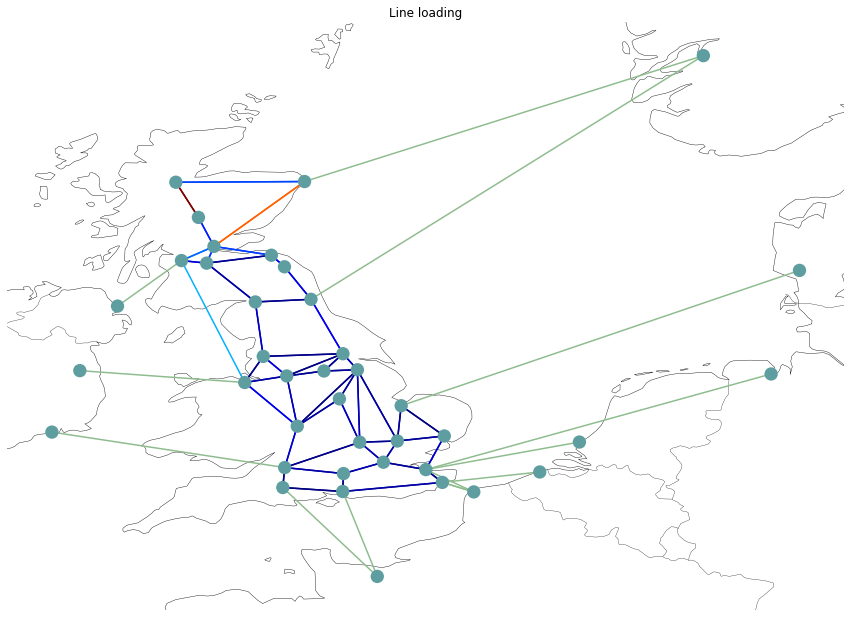

In [18]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

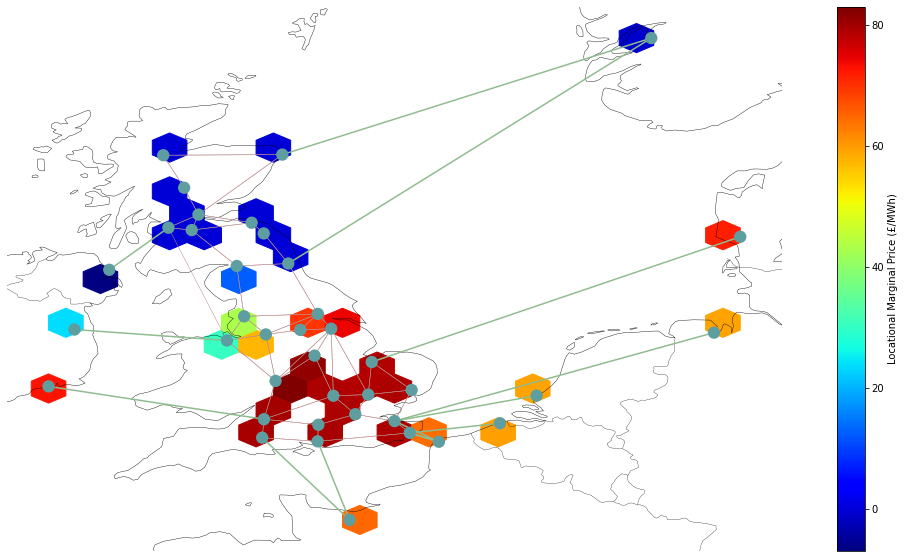

In [19]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [20]:
network.lines.s_nom_opt
difference = network.lines.s_nom_opt - network.lines.s_nom
relative_difference = (network.lines.s_nom_opt - network.lines.s_nom) / network.lines.s_nom

Text(0.5, 0, 'Line')

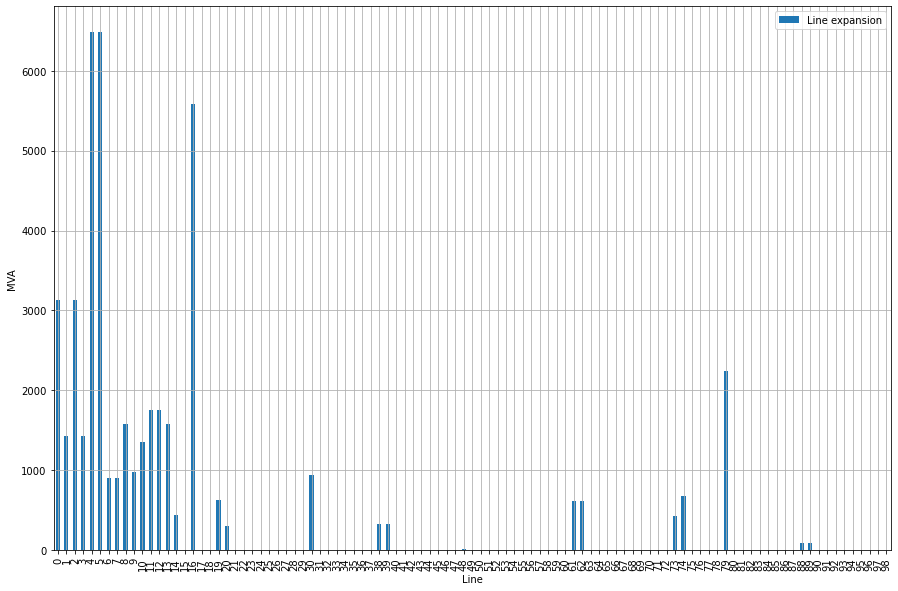

In [21]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

difference.plot(kind='bar', label="Line expansion", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MVA")
ax.set_xlabel("Line")

Text(0.5, 0, 'Line')

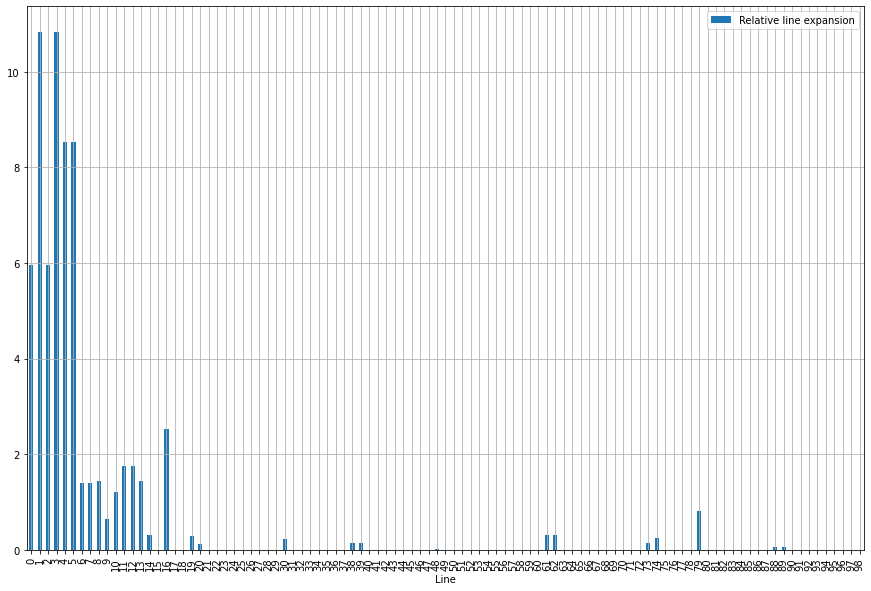

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

relative_difference.plot(kind='bar', label="Relative line expansion", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("")
ax.set_xlabel("Line")